# 주제 : 데이터 분석으로 심부전증을 예방할 수 있을까?
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 Heart Failure Prediction 데이터셋을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    heart_failure_clinical_records_dataset.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    age: 환자의 나이
    anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
    creatinine_phosphokinase: 크레아틴키나제 검사 결과
    diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
    ejection_fraction: 박출계수 (%)
    high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
    platelets: 혈소판 수 (kiloplatelets/mL)
    serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
    serum_sodium: 혈중 나트륨 레벨 (mEq/L)
    sex: 성별 (0: 여성, 1: 남성)
    smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
    time: 관찰 기간 (일)
    DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)
    
    
    
- 데이터 출처: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


## 최종 목표
    - 의료 데이터와 그 분석에 대한 이해
    - Colab 및 Pandas 라이브러리 사용법 이해
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - Classification 모델의 학습과 평가 방법 이해

- 출제자 : 신제용 강사
---

# Step 1. 데이터셋 준비하기

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
data=pd.read_csv('./heart_failure_clinical_records_dataset.csv')

In [31]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## Step 2. EDA 및 데이터 기초 통계 분석

In [32]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [33]:
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [35]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### 수치형 데이터 분석

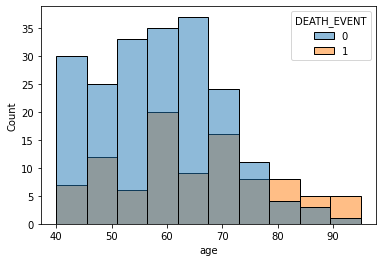

In [49]:
sns.histplot(x='age',hue='DEATH_EVENT',data=data)
# 

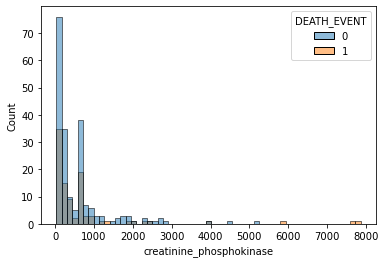

In [50]:
sns.histplot(x='creatinine_phosphokinase',hue='DEATH_EVENT',data=data)
# 아웃라이어가 많음

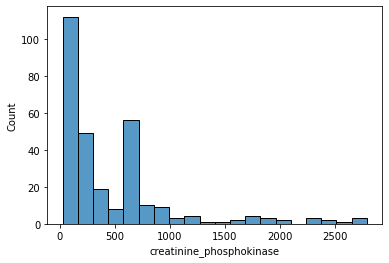

In [51]:
new_data=data[data['creatinine_phosphokinase']<3000]
#sns.histplot(x='creatinine_phosphokinase',hue='DEATH_EVENT',data=new_data)
# 혹은
sns.histplot(data=data.loc[data['creatinine_phosphokinase']<3000,'creatinine_phosphokinase'])

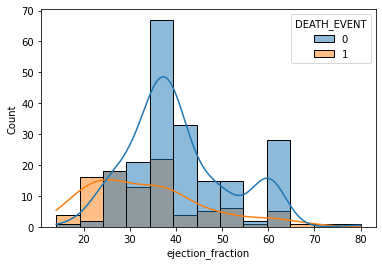

In [52]:
sns.histplot(x='ejection_fraction', data=data, bins=13,hue='DEATH_EVENT',kde=True)

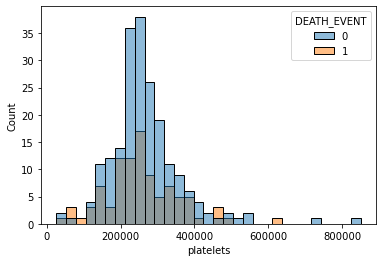

In [53]:
sns.histplot(x='platelets',hue='DEATH_EVENT', data=data)

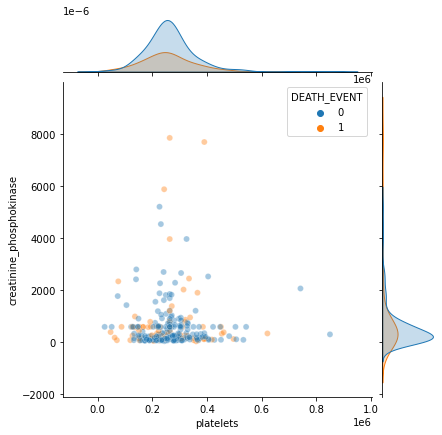

In [54]:
sns.jointplot(x='platelets', y='creatinine_phosphokinase',hue='DEATH_EVENT',data=data, alpha=0.4)

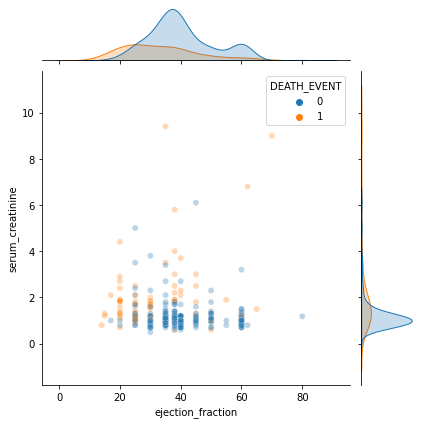

In [136]:
sns.jointplot(x='ejection_fraction',y='serum_creatinine',data=data,hue='DEATH_EVENT',alpha=0.3)

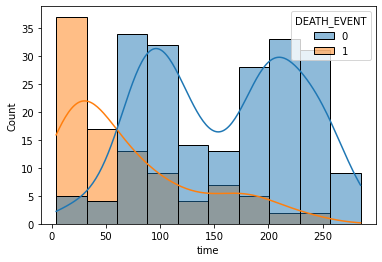

In [122]:
sns.histplot(x='time',hue='DEATH_EVENT',data=data, kde=True)

## 범주형 데이터 분석
- boxplot 활용

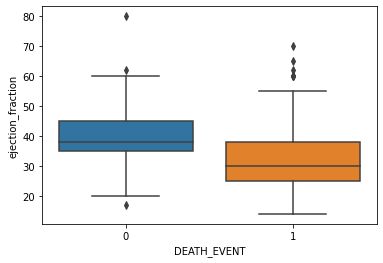

In [55]:
sns.boxplot(x='DEATH_EVENT',y='ejection_fraction',data=data)

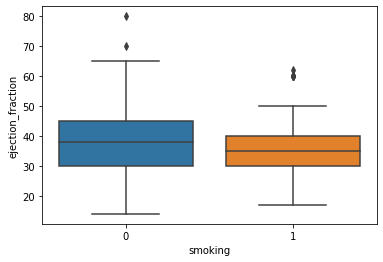

In [57]:
sns.boxplot(x='smoking',y='ejection_fraction',data=data)
# 흡연자들의 박출계수 범위가 좁고 적다

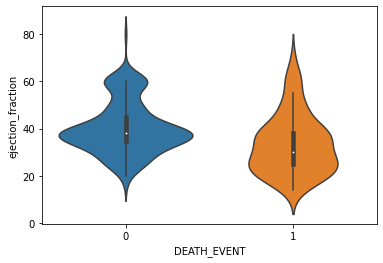

In [58]:
sns.violinplot(x='DEATH_EVENT',y='ejection_fraction',data=data)

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


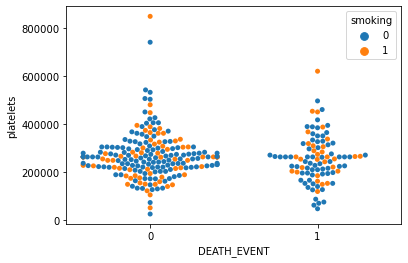

In [61]:
sns.swarmplot(x='DEATH_EVENT',y='platelets',data=data,hue='smoking')

### 모델 학습을 위한 데이터 전처리

In [62]:
from sklearn.preprocessing import StandardScaler

In [64]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [123]:
# 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분하기
X_num = data[['age', 'creatinine_phosphokinase' ,'ejection_fraction' ,
             'platelets', 'serum_creatinine', 'serum_sodium']]
X_cat= data[['anaemia','diabetes', 'high_blood_pressure','sex', 'smoking']]
y=data['DEATH_EVENT']

In [124]:
# 수치형 입력 데이터 전처리 후 입력 데이터 통합
scaler=StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
# index 와 column 정보가 다 빠짐
X_scaled= pd.DataFrame(data=X_scaled,index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled,X_cat],axis=1)
X.head()


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,1,1,0,0,0


## 학습데이터와 테스트 데이터 분리하기

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1,shuffle=False)
# test 30% 
# shuffle=False -> 앞의 데이터로 분석, 뒤의 데이터로 Test


## Classification 모델 학습하기

##### Logistic Regression 모델 생성/학습하기

- 공부해오기

In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## 모델 학습 결과 평가하기

In [129]:
from sklearn.metrics import classification_report

In [130]:
pred=model_lr.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.82      0.89        83
           1       0.29      0.86      0.43         7

    accuracy                           0.82        90
   macro avg       0.64      0.84      0.66        90
weighted avg       0.93      0.82      0.86        90



## XGBoost 모델 생성/학습하기

In [131]:
from xgboost import XGBClassifier

In [132]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

[15:05:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [133]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.63      0.77        83
           1       0.18      1.00      0.31         7

    accuracy                           0.66        90
   macro avg       0.59      0.81      0.54        90
weighted avg       0.94      0.66      0.73        90



## 특징의 중요도 확인하기

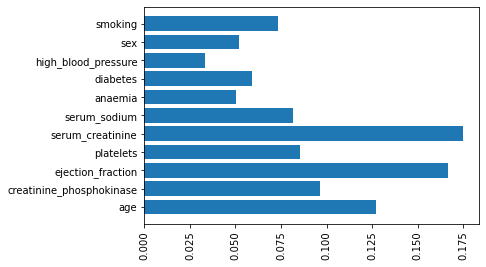

In [134]:
# XGBClassifier 모델의 feature_importances_를 이용하여 중요도 plot
plt.barh(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

## Precision - Recall 커브 확인하기

In [138]:
from sklearn.metrics import plot_precision_recall_curve

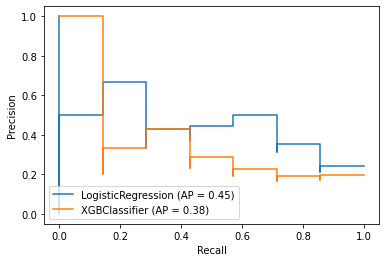

In [140]:
# 두 모델 Prediction recall 커브를 한번에 그리기
fig=plt.figure()
ax=fig.gca()
plot_precision_recall_curve(model_lr,X_test,y_test,ax=ax)
plot_precision_recall_curve(model_xgb,X_test,y_test,ax=ax)